# Homework 4

In [110]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import EoN as eon
from sklearn.metrics import r2_score



In [111]:
# Read the graph
G = nx.read_edgelist("fludata.txt", nodetype=int, data=(("weight", float),))

## Part 1

### A) Plot Infected Individuals Over Time

In [112]:
tmax = 10
beta = 0.01      # transmission rate
mu = 0.5         # recovery rate
initial_infected = 325

Text(0, 0.5, 'Population')

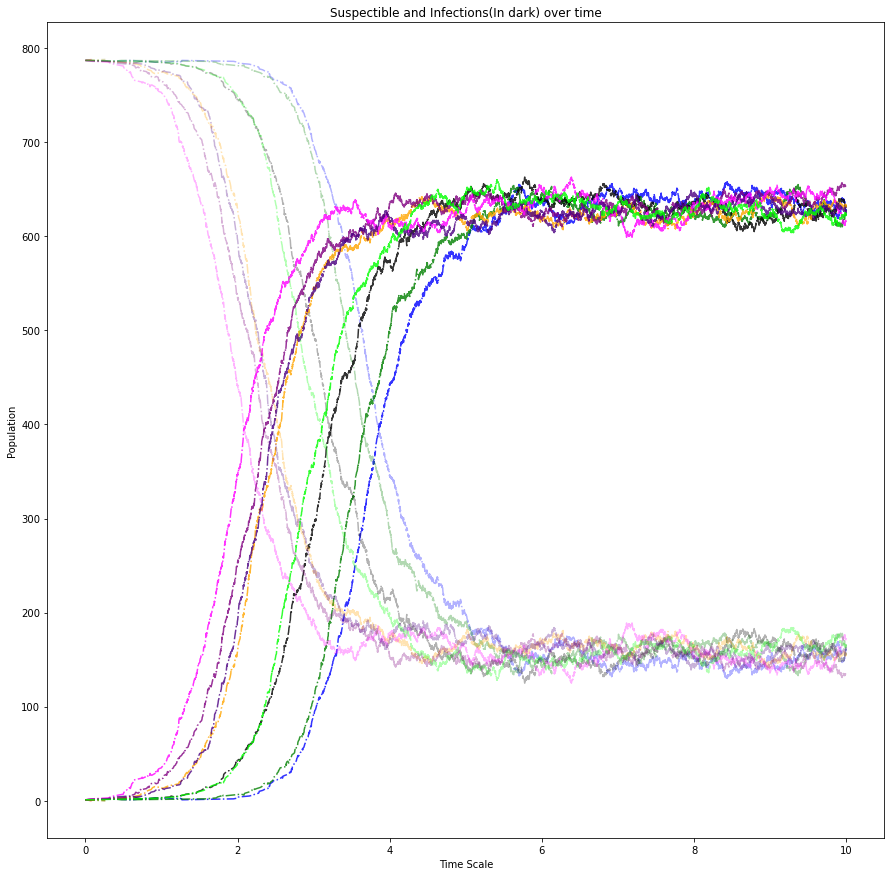

In [115]:
# TODO run 10 simulations and plot the number of infected over time
color = ['r','b','g','black','orange','purple','magenta','indigo','olive','lime']
plt.figure(figsize=(15,15));
for i in range(10):    
    t, S, I = eon.fast_SIS(G, beta, mu, tmax = 10,
                                initial_infecteds = 325)

    plt.plot(t, S, '-.', color=color[i], alpha=0.3)
    plt.plot(t, I, '-.', color=color[i], alpha=0.8)

plt.title('Suspectible and Infections(In dark) over time')
plt.xlabel('Time Scale')
plt.ylabel('Population')


In [116]:
print(len(I))
print(len(S))
print(len(t))

4999
4999
4999


In [117]:
print(I)

[  1   2   3 ... 623 622 623]


In [118]:
print(S)

[787 786 785 ... 165 166 165]


Comment on your observations about the number of infected:
The number of infections as expected rises exponentially till it reaches a threshold after which it remains the same . Similarly the number of suspectibles also decreases exponentially and reaches a threshold. 


---
### B) Actual VS Estimated Infected

In [119]:
# Compute tau from simulations
def funfit(t, tau):
    return np.exp(t/tau)

tb = t[np.where(I<=100)]
infb = I[I<=100]
# tb = np.array(tb)
# tb

In [120]:
print(len(tb))
print(len(infb))

130
130


In [121]:
params, _ = scipy.optimize.curve_fit(funfit, tb, infb)
params

array([0.52487398])

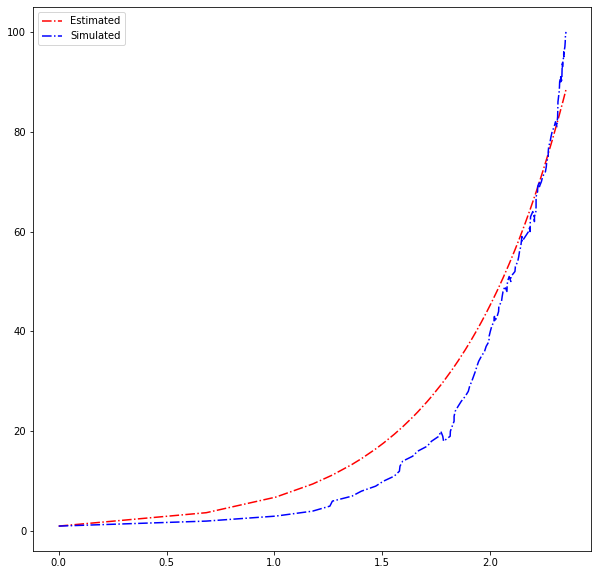

In [122]:
# Plot the actual number of infected and the exponential fit computed
est_tau = params[0]
expfit = []
for ti in tb:
    val = np.exp(ti/est_tau)
    expfit.append(val)

plt.figure(figsize=(10,10));
plt.plot(tb, expfit, '-.', color='r', label='Estimated')
plt.plot(tb, infb, '-.', color='b', label='Simulated')
plt.legend()

In [123]:
# quantify closeness
r2sq_score = r2_score(infb, expfit)
r2sq_score

0.9535268484685357

---
### C) Simulated VS Theoretical Estimates of $\tau$

In [124]:
# Run several times (25x or more) to compute distribution of tau
tau_all = []
counter = 0
while True:
    if counter==25:
        break
    
    t, S, I = eon.fast_SIS(G, beta, mu, tmax = 10,
                                initial_infecteds = 325)
    if I[len(I)-1]==0:
        continue
    tb = t[np.where(I<=100)]
    infb = I[I<=100]
    params, _ = scipy.optimize.curve_fit(funfit, tb, infb)
    tau_m = params[0]
    tau_all.append(tau_m)
    counter = counter+1


In [125]:
tau_all

[0.31465164457647476,
 0.5124368905286983,
 0.36000103651798726,
 0.35398892946664623,
 0.5197306960483857,
 0.4308440161286156,
 0.41557724337372903,
 0.542394414306959,
 0.3694810084702335,
 0.35741729029481284,
 0.4153028225980496,
 0.4102715287268695,
 0.34809327909722954,
 0.438401680282425,
 0.3570953612310679,
 0.26926524289781134,
 0.4075432930764422,
 0.7142495246214827,
 0.29225874329622364,
 0.2827624828768463,
 0.3798292799586096,
 0.47712721423109195,
 0.2720304077990686,
 0.29519540845090864,
 0.3934940810620878]

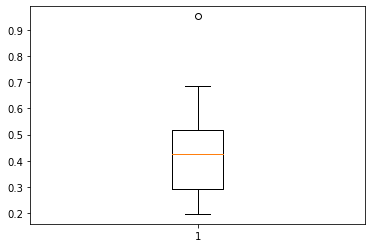

In [36]:
fig, ax = plt.subplots()
ax.boxplot(tau_all)
plt.show()

Manually compute the theoretical values of tau here (include the formula and your results):

**For random distribution from Canvas:**

In [126]:
# calculate random distribution
# 1/k1Beta - mu for Random Distribution 
#SIS model
def nth_moment(g,n):
    s = 0
    for node in g.nodes:
        s += g.degree[node] ** n
    return (s/len(g))

In [127]:
k1 = nth_moment(G,1)
tau_SIS_rn = 1/(k1*beta - mu)
tau_SIS_rn

0.3996307979430171

**For arbitrary distribution from Canvas**

In [128]:
# calculate arbitrary distribution (from Canvas)
k2 = nth_moment(G,2)
tau_SIS_ar = k1/(beta*k2 - (beta+mu)*k1)
tau_SIS_ar

0.3511723041185225

**For arbitrary distribution in textbook**

In [129]:
# calculate arbitrary distribution (from textbook)
tau_SIS_txtb = k1/(beta*k2 - mu*k1)
tau_SIS_txtb

0.34994339981827

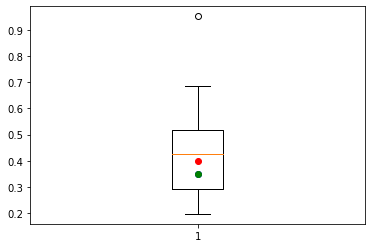

In [42]:
# Plot the experimental distribution (box plot would be preferred) and theoretical values
fig, ax = plt.subplots()
ax.boxplot(tau_all)
plt.scatter(1,tau_SIS_rn, color='r', label='Random Distribution')
plt.scatter(1,tau_SIS_ar, color='b', label='Arbitrary Distribution')
plt.scatter(1,tau_SIS_txtb, color='g', label='Arbitrary Distribution from Book')
plt.show()

Which distributions match your simulation results most accurately?
Answer : Per my opinion the Tau value from the Ranom Distribution matches much closely to the average value of taus from Simulation. 

---
### D) Infection at the Endemic State

Compute the theoretical expected value of $i(\infty)$:


In [130]:
# Compute the distribution of i(\inf)
inf_rate = 1 - mu/(beta*k1)
inf_rate

0.8334615482158406

In [65]:
color = ['r','b','g','black','orange','purple','magenta','indigo','olive','lime']
plt.figure(figsize=(10,10));
totalpopulation = 788
inf_rate_all = []
beta = .01
for i in range(10):    
    t, S, I = eon.fast_SIS(G, beta, mu, tmax = 10,
                                initial_infecteds = 325)
    if I[len(I)-1]==0:
        continue
    #plt.plot(t, S, '-.', color=color[len(color)%i], alpha=0.3)
    #tend = t[(t<=6) & (t>5)]
    Iend = I[np.where((t<=8) & (t>5))]
    #vari = np.var(Iend)
    #std = np.std(Iend)
    #print(vari,std)
    infRate = (np.mean(Iend))/totalpopulation
    inf_rate_all.append(infRate)
    #plt.plot(t, I, '-.', color=color[len(color)%i], alpha=0.8)



<Figure size 720x720 with 0 Axes>

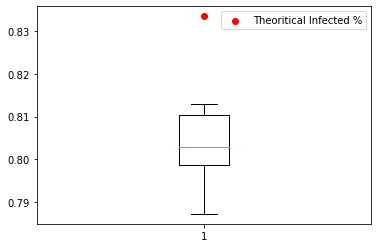

In [55]:
# Plot the experimental distribution of i(\inf) and theoretical value
fig, ax = plt.subplots()
ax.boxplot(inf_rate_all)
plt.scatter(1,inf_rate, color='r', label='Theoritical Infected %')
plt.legend()
plt.show()

---
## Part 2

### A) Varying Transmission Rate $\beta$

In [104]:
mu = 0.5
betas = np.linspace(0,.5,20)
#beta

In [105]:
def findEndTime(inf_arr, time_arr, tmax):
    intval = 3
    minima = np.inf
    bestintval = [0,0]
    for i in range(tmax-intval):
        Iend = inf_arr[np.where((time_arr<tmax) & (time_arr>=i))]
        vari = np.var(Iend)
        #print(vari)
        if vari < minima:
            bestintval[0] = i
            bestintval[1] = tmax-1
            minima = vari
    return bestintval

In [106]:
# Run simulations by varying beta
tinp = 10
#betas = [.01]
betas_avg_inf = []
for beta in betas:
    perbeta = []
    for i in range(30):    
        t, S, I = eon.fast_SIS(G, beta, mu, tmax = tinp,
                                    initial_infecteds = 325)
        tval = findEndTime(I,t, tmax)
        Iend = I[np.where((t<=tval[1]) & (t>=tval[0]))]
        infRate = (np.mean(Iend))
        perbeta.append(infRate)
        #print(infRate)
    betas_avg_inf.append(np.mean(perbeta))
#print(betas_avg_inf)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<function matplotlib.pyplot.show(close=None, block=None)>

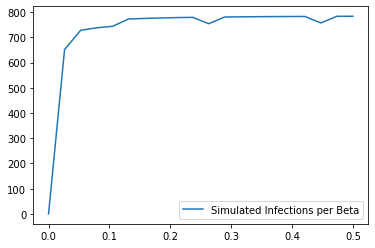

In [155]:
# Plot # infected individuals at the epidemic state vs beta
plt.plot(betas,betas_avg_inf, label='Simulated Infections per Beta')
#plt.scatter(betas,betas_avg_inf )
#plt.scatter(betas,thrbtval)
plt.legend()
plt.show

---
### B) Minimum Transmission Rate for Epidemic

Compute theoretical values for minimum $\beta$ required for epidemic to occur:

**Random distribution:**

In [150]:
# for a random degree distribution
brnd_min = mu/k1
print(brnd_min)

0.0016653845178415938


**Arbitrary distribution:**

In [151]:
# for an arbitrary distribution
barb_min = mu*k1/(k2-k1)
print(barb_min)

0.001493605141160339


**Beta Theoretical And Experimental Calculation**

In [152]:
# Compute the theoretical number of infected individuals with different betas as well as the simulation.
# Plot those two curves in one plot and compare them.
thrbtval = []
for bts in betas:
    deno = bts*k1
    if deno==0:
        thrbtval.append(0)
        continue
    inf_rate = 1 - mu/(bts*k1)
    inf_pop = totalpopulation*inf_rate
    thrbtval.append(inf_pop)


<function matplotlib.pyplot.show(close=None, block=None)>

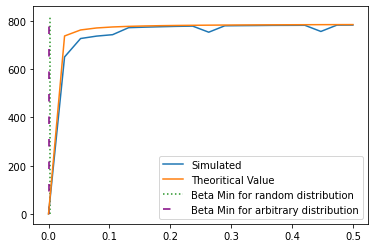

In [153]:
# Plot # infected individuals at the epidemic state vs beta
plt.plot(betas,betas_avg_inf, label='Simulated')
plt.plot(betas,thrbtval, label='Theoritical Value')
#plt.scatter(betas,betas_avg_inf )
#plt.scatter(betas,thrbtval)
plt.vlines(brnd_min,0,820,colors = 'g', linestyles='dotted', alpha=.85, label= 'Beta Min for random distribution')
plt.vlines(barb_min,0,820,colors= 'purple', linestyle='dashed', dashes=(0,(5,10)), label= 'Beta Min for arbitrary distribution')
plt.legend()

plt.show

In [160]:
# Find min value of \beta experimentally
betas_avg_inf = np.array(betas_avg_inf)
res = np.min(betas[np.where(betas_avg_inf>(totalpopulation/2))])
res

0.02631578947368421

Comments on the above.

---
## Part 3

### A) Patient-0 Centrality & $\tau$

In [172]:
# Run simulations with each node as initial infected and compute tau
goodruns = []
tausall = []
beta = .01
mu=.5
for node in G.nodes: #totalpopulation
    t, S, I = eon.fast_SIS(G, beta, mu, tmax = 10,
                                initial_infecteds = node)
    if I[len(I)-1]==0:
        continue
    goodruns.append(node)
    tbn = t[np.where(I<=100)]
    infbn = I[I<=100]
    params, _ = scipy.optimize.curve_fit(funfit, tbn, infbn)
    tau_node = params[0]
    tausall.append(tau_node)



C:\Users\hk_le\AppData\Local\Temp/ipykernel_14844/2530604060.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(t/tau)


In [174]:
print(len(goodruns))
print(len(tausall))

609
609


In [175]:
# Compute centrality metrics
eig = nx.eigenvector_centrality(G)
eig_goodruns = [eig[x] for x in goodruns]
print(len(eig_goodruns))

609


In [185]:
close = nx.closeness_centrality(G)
close_goodruns = [close[x] for x in goodruns]
print(len(close_goodruns))

609


In [189]:
btwn = nx.betweenness_centrality(G)
btwn_goodruns = [btwn[x] for x in goodruns]
print(len(btwn_goodruns))

609


In [198]:
degr = nx.degree_centrality(G)
degree_goodruns = [degr[x] for x in goodruns]
print(len(degree_goodruns))

609


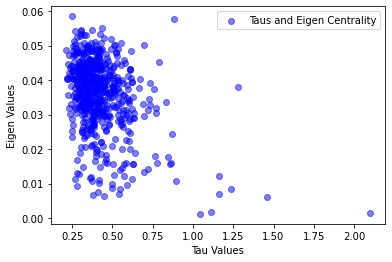

In [195]:
# Plot centrality metrics v/s tau - 4 plots
plt.scatter(tausall,eig_goodruns, color='b', alpha=.5, label='Taus and Eigen Centrality')
#plt.scatter(goodruns, eig_goodruns, color='b', label='Eigen Centrality per Node')
plt.ylabel('Eigen Values')
plt.xlabel('Tau Values')
plt.legend()
plt.show()

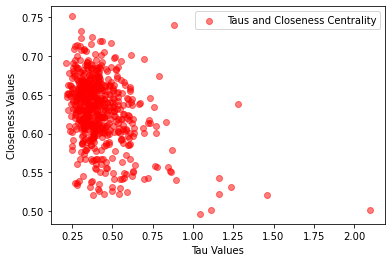

In [196]:
plt.scatter(tausall,close_goodruns, color='r', alpha=.5, label='Taus and Closeness Centrality')
plt.ylabel('Closeness Values')
plt.xlabel('Tau Values')
plt.legend()
plt.show()

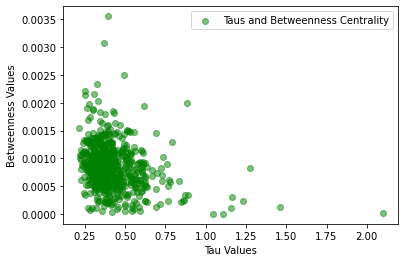

In [197]:
plt.scatter(tausall,btwn_goodruns, color='g', alpha=.5, label='Taus and Betweenness Centrality')
plt.ylabel('Betweenness Values')
plt.xlabel('Tau Values')
plt.legend()
plt.show()

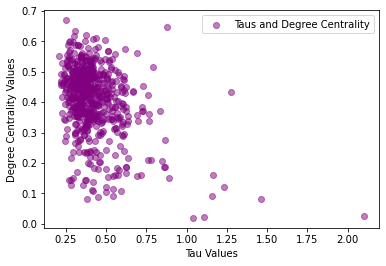

In [199]:
plt.scatter(tausall,degree_goodruns, color='purple', alpha=.5, label='Taus and Degree Centrality')
plt.ylabel('Degree Centrality Values')
plt.xlabel('Tau Values')
plt.legend()
plt.show()

---
### B) Correlation between centrality and $\tau$


In [207]:
# Compute the Pearson correlation coefficient
import scipy.stats

eig_corr = scipy.stats.pearsonr(tausall, eig_goodruns)[0]
close_corr= scipy.stats.pearsonr(tausall, close_goodruns)[0]
btwn_corr = scipy.stats.pearsonr(tausall, btwn_goodruns)[0]
degree_corr = scipy.stats.pearsonr(tausall, degree_goodruns)[0]

print(eig_corr, close_corr, btwn_corr, degree_corr)
totalNodes = len(tausall)

#print(eig_conf, close_conf, btwn_conf, degree_conf)

-0.37762488886177226 -0.3561398695412918 -0.27535519328717584 -0.3782748351490554


In [212]:
def getConf(corr, tnod, centra):
    rng = np.arctanh(corr)
    low = rng - (1.96/np.sqrt(totalNodes-3))
    hih = rng + (1.96/np.sqrt(totalNodes-3))
    print(centra +'>>>'+ str(low), str(hih))


In [214]:
getConf(eig_corr,totalNodes,'Eigen Confidence')
getConf(close_corr,totalNodes,'Closeness Confidence')
getConf(btwn_corr,totalNodes,'Betweenness Confidence')
getConf(degree_corr,totalNodes,'Degree Confidence')

Eigen Confidence>>>-0.4769061658450441 -0.3176670509593761
Closeness Confidence>>>-0.452077606454537 -0.292838491568869
Betweenness Confidence>>>-0.3622687518115616 -0.20302963692589363
Degree Confidence>>>-0.47766442679491183 -0.31842531190924395


---
### C) Centrality as an Outbreak Predictor

The order here, from best to worst is:
1. Eigen Centrality
2. Degree Centrality
3. Closeness Centrality
4. Betweenness Centrality

Comment on your observations
The Correlation is higher for Eigen and Degree with the Taus which is a key factor in predicting the spread of pandemic.

## Part 4 - Knowledge Question

Your answer to the modularity proof food for thought here